In [1035]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [1036]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [1037]:
LeadScore_df = pd.read_csv("Lead-analysis/LeadGenN.csv", encoding='utf-8-sig',parse_dates=['Web_Date','SubYearMonth','Lead_Capture_Date','Inception_Date_LT'])
LeadScore_df

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,LT_FILTERID,LTTest_Naics,...,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Date,Web_Form_Name,Web_Gross_Annual_Sales,Web_Time_in_Business,Year_Established,Merged Years in Business,Years_in_Business
0,220000.0,2020-09-12,0,1,2021-09-12,00Q4u00001h8MyqEAE,24,SCORPORATION,902934.0,ACCOMMODATIONANDFOODSERVICES,...,1101.0,Lending Tree,NaN,2021-09-12,NaN,$200k-$500k,NaN,NaN,-1,1
1,225000.0,2020-09-06,0,0,2021-09-10,00Q4u00001h88vdEAA,19,LLC,900069.0,TRANSPORTATIONANDWAREHOUSING,...,1101.0,Lending Tree,NaN,2021-09-10,NaN,$200k-$500k,NaN,NaN,-1,1
2,115000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy2ocEAA,24,LLC,902932.0,TRANSPORTATIONANDWAREHOUSING,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$100k-$200k,NaN,NaN,-1,1
3,200000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy7ezEAA,10,LLC,900069.0,RETAILTRADE,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$200k-$500k,NaN,NaN,-1,1
4,840000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy9GhEAI,21,LLC,900070.0,OTHERSERVICESEXCEPTPUBLICADMINISTRATION,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$500k-$1mm,NaN,NaN,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79163,NaN,NaT,0,0,2021-09-13,00Q4u00001gRVFaEAO,15,NaN,NaN,NaN,...,5192.0,Direct,"$25,000 to $50,000",2021-09-13,NaN,$100k-$200k,1 to 3 Years,NaN,1 to 3 Years,1 to 3 Years
79164,0.0,NaT,0,0,2021-09-13,00Q4u00001cKc1AEAS,17,NaN,NaN,NaN,...,5061.0,Direct,"$25,000 to $50,000",2021-09-13,NaN,"Less than $100,000",1 to 3 Years,0.0,1 to 3 Years,1 to 3 Years
79165,900000.0,NaT,0,0,2021-09-13,00Q4u00001h8XgxEAE,13,NaN,NaN,NaN,...,1280.0,Strategic Partners,NaN,NaT,NaN,$500k-$1mm,NaN,NaN,NaN,NaN
79166,NaN,NaT,0,0,2021-09-13,00Q4u00001gRVrFEAW,19,NaN,NaN,NaN,...,5061.0,Direct,"$25,000 to $50,000",2021-09-13,NaN,$200k-$500k,1 to 3 Years,NaN,1 to 3 Years,1 to 3 Years


In [1038]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79168 entries, 0 to 79167
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AnnualRevenue                 54552 non-null  float64       
 1   Inception_Date_LT             23390 non-null  datetime64[ns]
 2   Is_Funded                     79168 non-null  int64         
 3   Is_Submitted                  79168 non-null  int64         
 4   Lead_Capture_Date             79168 non-null  datetime64[ns]
 5   LEAD_ID                       79168 non-null  object        
 6   Lead_Score                    79168 non-null  int64         
 7   Legal_Entity_Type_LT          23390 non-null  object        
 8   LT_FILTERID                   24698 non-null  object        
 9   LTTest_Naics                  17413 non-null  object        
 10  OPPORTUNITY_ID                79168 non-null  object        
 11  Requested_Amount            

In [1039]:
LeadScore_df.isnull().sum()

AnnualRevenue                   24616
Inception_Date_LT               55778
Is_Funded                           0
Is_Submitted                        0
Lead_Capture_Date                   0
LEAD_ID                             0
Lead_Score                          0
Legal_Entity_Type_LT            55778
LT_FILTERID                     54470
LTTest_Naics                    61755
OPPORTUNITY_ID                      0
Requested_Amount                40611
Self_Graded_Credit               9524
Submit_for_Pre_Approval_Date    66528
SubYearMonth                    66528
Type_of_Entity                  67212
Web_Ad_Outlet                    1108
Web_Ad_Outlet_Source              445
Web_Amount_to_Borrow            44178
Web_Date                        24515
Web_Form_Name                   79168
Web_Gross_Annual_Sales          14969
Web_Time_in_Business            43962
Year_Established                59420
Merged Years in Business        20572
Years_in_Business               20572
dtype: int64

In [1040]:
LeadScore_df.columns

Index(['AnnualRevenue', 'Inception_Date_LT', 'Is_Funded', 'Is_Submitted',
       'Lead_Capture_Date', 'LEAD_ID', 'Lead_Score', 'Legal_Entity_Type_LT',
       'LT_FILTERID', 'LTTest_Naics', 'OPPORTUNITY_ID', 'Requested_Amount',
       'Self_Graded_Credit', 'Submit_for_Pre_Approval_Date', 'SubYearMonth',
       'Type_of_Entity', 'Web_Ad_Outlet', 'Web_Ad_Outlet_Source',
       'Web_Amount_to_Borrow', 'Web_Date', 'Web_Form_Name',
       'Web_Gross_Annual_Sales', 'Web_Time_in_Business', 'Year_Established',
       'Merged Years in Business', 'Years_in_Business'],
      dtype='object')

In [1041]:
LeadScore_df.groupby('Web_Ad_Outlet').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet
1000.0    644
1001.0    138
1002.0     12
1003.0      7
1005.0      0
         ... 
5077.0      3
5081.0    790
5190.0    240
5191.0      6
5192.0    348
Name: Is_Submitted, Length: 65, dtype: int64

In [1042]:
LeadScore_df.groupby('Web_Amount_to_Borrow').sum()['Is_Submitted'].round(decimals=2)

Web_Amount_to_Borrow
$10,000 to $25,000      850
$100,000 or More        223
$25,000 to $50,000     1232
$5,000 to $10,000       377
$50,000 to $100,000     447
10,000.00                 1
100,000 or More           4
150,000.00               86
25,000.00               282
250,000.00               28
5,000.00                 63
50,000.00                 1
75,000.00               259
Name: Is_Submitted, dtype: int64

In [1043]:
LeadScore_df.groupby('Is_Submitted').mean()['Lead_Score'].round(decimals=2)

Is_Submitted
0    14.83
1    14.52
Name: Lead_Score, dtype: float64

In [1044]:
LeadScore_df.groupby('Web_Gross_Annual_Sales').sum()['Is_Submitted'].round(decimals=2)

Web_Gross_Annual_Sales
$100k-$200k           2915
$1mm+                 1129
$200k-$500k           2884
$500k-$1mm            1130
Less than $100,000    1889
Name: Is_Submitted, dtype: int64

In [1045]:
LeadScore_df.groupby('Web_Time_in_Business').sum()['Is_Submitted'].round(decimals=2)

Web_Time_in_Business
0-6 Months                 2
1 to 3 Years            1940
1-3 years                  0
3 years or more            0
6 Months to 1 Year       571
6-12 Months                0
Greater than 3 Years    1261
Less than 6 Months       119
Name: Is_Submitted, dtype: int64

In [1046]:
LeadScore_df['Web_Amount_to_Borrow'] = LeadScore_df['Web_Amount_to_Borrow'].str.replace(',','')

In [1047]:
LeadScore_df['Web_Amount_to_Borrow'].fillna(LeadScore_df['Requested_Amount'], inplace = True)
LeadScore_df['Requested_Amount'].fillna(LeadScore_df['Web_Amount_to_Borrow'], inplace = True)

LeadScore_df['Type_of_Entity'].fillna(LeadScore_df['Legal_Entity_Type_LT'], inplace = True)
LeadScore_df['Legal_Entity_Type_LT'].fillna(LeadScore_df['Type_of_Entity'], inplace = True)

LeadScore_df['AnnualRevenue'].fillna(LeadScore_df['Web_Gross_Annual_Sales'], inplace = True)

In [1048]:
LeadScore_df['Requested_Amount'] = LeadScore_df['Requested_Amount'].str.replace(',','')

In [1049]:
LeadScore_df.isnull().sum()

AnnualRevenue                    7846
Inception_Date_LT               55778
Is_Funded                           0
Is_Submitted                        0
Lead_Capture_Date                   0
LEAD_ID                             0
Lead_Score                          0
Legal_Entity_Type_LT            43830
LT_FILTERID                     54470
LTTest_Naics                    61755
OPPORTUNITY_ID                      0
Requested_Amount                44642
Self_Graded_Credit               9524
Submit_for_Pre_Approval_Date    66528
SubYearMonth                    66528
Type_of_Entity                  43830
Web_Ad_Outlet                    1108
Web_Ad_Outlet_Source              445
Web_Amount_to_Borrow             6085
Web_Date                        24515
Web_Form_Name                   79168
Web_Gross_Annual_Sales          14969
Web_Time_in_Business            43962
Year_Established                59420
Merged Years in Business        20572
Years_in_Business               20572
dtype: int64

In [1050]:
LeadScore_df = LeadScore_df.drop(['Inception_Date_LT','Legal_Entity_Type_LT','LTTest_Naics','Submit_for_Pre_Approval_Date','Type_of_Entity','LT_FILTERID','Web_Form_Name','Requested_Amount','Web_Date','Web_Time_in_Business','Year_Established','SubYearMonth','Submit_for_Pre_Approval_Date','OPPORTUNITY_ID','LEAD_ID','Lead_Capture_Date','Merged Years in Business'], axis=1)
LeadScore_df.sample(20)

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Years_in_Business
61060,0.0,0,0,11,2.0,5061.0,Direct,$25000 to $50000,"Less than $100,000",1 to 3 Years
72228,"Less than $100,000",0,0,14,3.0,5061.0,Direct,$25000 to $50000,"Less than $100,000",1 to 3 Years
33426,"Less than $100,000",0,0,16,4.0,5000.0,Direct,$50000 to $100000,"Less than $100,000",1 to 3 Years
40305,$100k-$200k,0,0,12,2.0,1000.0,Digital-Organic,$25000 to $50000,$100k-$200k,6 Months to 1 Year
33547,600000.0,0,0,11,2.0,1280.0,Strategic Partners,499999.0,$500k-$1mm,NaN
13988,140000.0,0,0,24,4.0,1101.0,Lending Tree,7500.0,NaN,5
47536,"Less than $100,000",0,0,16,4.0,1000.0,Digital-Organic,$50000 to $100000,"Less than $100,000",Less than 6 Months
7583,200000.0,0,0,15,2.0,1101.0,Lending Tree,50000.0,$200k-$500k,3
1371,333000.0,0,0,24,1.0,1101.0,Lending Tree,100000.0,$200k-$500k,1
72797,"Less than $100,000",0,0,8,1.0,1000.0,Digital-Organic,$10000 to $25000,"Less than $100,000",1 to 3 Years


In [1051]:
LeadScore_df.groupby('Web_Ad_Outlet_Source').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet_Source
Digital - Affiliate     145
Digital-Organic         833
Digital-PPC             472
Direct                 3493
Lending Tree           3337
Strategic Partners     4137
Name: Is_Submitted, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lending Tree'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'Strategic Partners'),
  Text(3, 0, 'Digital-PPC'),
  Text(4, 0, 'Digital-Organic'),
  Text(5, 0, 'Digital - Affiliate')])

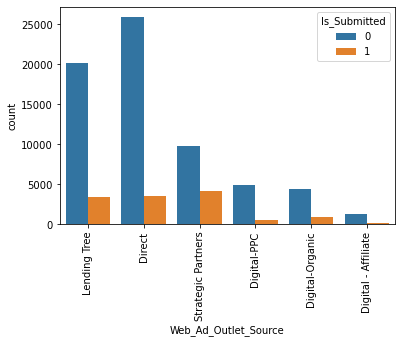

In [1052]:
sns.countplot(x = "Web_Ad_Outlet_Source", hue = "Is_Submitted", data = LeadScore_df)
xticks(rotation = 90)

In [1053]:
LeadScore_mask = (LeadScore_df.Is_Submitted == 1) & (LeadScore_df.Web_Ad_Outlet_Source == 'Lending Tree')

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered.sample(10)

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Years_in_Business
509,480000.0,0,1,16,2.0,1101.0,Lending Tree,40000.0,$200k-$500k,1
12719,180000.0,0,1,12,1.0,1101.0,Lending Tree,20000.0,$100k-$200k,4
2946,140000.0,0,1,24,3.0,1101.0,Lending Tree,50000.0,$100k-$200k,1
13761,268000.0,0,1,24,4.0,1101.0,Lending Tree,10000.0,$200k-$500k,5
21154,150000.0,0,1,12,1.0,1101.0,Lending Tree,25000.0,$100k-$200k,16
13770,250000.0,0,1,19,3.0,1101.0,Lending Tree,50000.0,$200k-$500k,5
17701,175000.0,0,1,16,3.0,1101.0,Lending Tree,100000.0,$100k-$200k,8
960,104000.0,0,1,18,3.0,1101.0,Lending Tree,50000.0,$100k-$200k,1
4335,100000.0,1,1,21,4.0,1101.0,Lending Tree,50000.0,$100k-$200k,2
1521,250000.0,1,1,16,2.0,1101.0,Lending Tree,15000.0,$200k-$500k,1


In [1054]:
LeadScore_df = LeadScore_df.dropna()
LeadScore_df

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Years_in_Business
0,220000.0,0,1,24,4.0,1101.0,Lending Tree,65000.0,$200k-$500k,1
1,225000.0,0,0,19,3.0,1101.0,Lending Tree,25000.0,$200k-$500k,1
2,115000.0,0,0,24,2.0,1101.0,Lending Tree,70000.0,$100k-$200k,1
3,200000.0,0,0,10,1.0,1101.0,Lending Tree,60000.0,$200k-$500k,1
4,840000.0,0,0,21,4.0,1101.0,Lending Tree,100000.0,$500k-$1mm,1
...,...,...,...,...,...,...,...,...,...,...
79160,$100k-$200k,0,0,15,3.0,1240.0,Strategic Partners,$10000 to $25000,$100k-$200k,Greater than 3 Years
79163,$100k-$200k,0,0,15,3.0,5192.0,Direct,$25000 to $50000,$100k-$200k,1 to 3 Years
79164,0.0,0,0,17,4.0,5061.0,Direct,$25000 to $50000,"Less than $100,000",1 to 3 Years
79166,$200k-$500k,0,0,19,4.0,5061.0,Direct,$25000 to $50000,$200k-$500k,1 to 3 Years


In [1055]:
LeadScore_df.groupby('Is_Submitted').mean()['Self_Graded_Credit'].round(decimals=2)

Is_Submitted
0    3.05
1    3.10
Name: Self_Graded_Credit, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lending Tree'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'Strategic Partners'),
  Text(3, 0, 'Digital-PPC'),
  Text(4, 0, 'Digital-Organic'),
  Text(5, 0, 'Digital - Affiliate')])

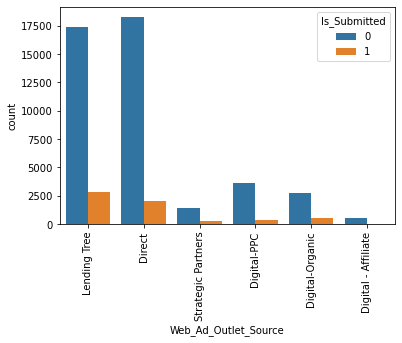

In [1056]:
sns.countplot(x = "Web_Ad_Outlet_Source", hue = "Is_Submitted", data = LeadScore_df)
xticks(rotation = 90)

In [1057]:
#ax = LeadScore_df['AnnualRevenue'].plot.hist(bins=25)

In [1058]:
LeadScore_df.groupby('Is_Submitted').mean()['Lead_Score'].round(decimals=2)

Is_Submitted
0    16.01
1    17.09
Name: Lead_Score, dtype: float64

In [1059]:
#Outlet ource Label
#1000= General-Organic , #1001= Google-Organic, #1002= Bing-Organic, #1003= Yahoo-Organic, #1004= LinkedIn-Organic,
#1010=Google-Non-Branded, #1011=Google-Branded, #1070= Facebook-Facebook, #1085= RateKick-Ratekick, #1101=LendingTree, 
#1118= TrafficPoint-General, #1119=BusinessLoans.com, #1241=Fleetcor, #1257=Fundera, #1280= Fundera, #1240=Fleetcor, 
#5000=DirectMail, #5018=DirectMail, #5021=D&B-ALC, #5037=DirectMail, #1226=Fundera, #5028=Epsilon, #5051=Direct Mail, 
#5081=Accutrend- ALC, #5190=DirectMail-Merit, #5053=DirectMail-Small Bussinesss, #5055=DirectMail-Epsilon on BalanceSheet,
#5061=Marketforce-ALC, #5071=Crosslists-ALC& New Bus, #5192=DirectMail-Merit 

In [1060]:
from sklearn.preprocessing import LabelEncoder

#Amount_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0, '$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

#LeadScore_df['Requested_Amount'].replace(Amount_dict, inplace=True)

Borrow_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0,'$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

LeadScore_df['Web_Amount_to_Borrow'].replace(Borrow_dict, inplace=True)

Sales_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}
             
LeadScore_df['Web_Gross_Annual_Sales'].replace(Sales_dict, inplace=True)

Revenue_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}

LeadScore_df['AnnualRevenue'].replace(Revenue_dict, inplace=True)

Source_dict = {1000:0, 1001:1, 1002:2, 1003:3, 1004:4, 1010:5, 1011:6, 1070:7, 1085:8, 1101:9, 1118:10,
              1119:11, 1241:12, 1243: 13, 1257:14, 1280:15, 1240:16, 5000:17, 5018:18, 5020:19, 5021:20, 5037:21, 1226:22,
              5028:23, 5051:24, 5081:25, 5190:26, 5053:27, 5055:28,5061:29, 5071:30, 5191:31, 5192:32}

LeadScore_df['Web_Ad_Outlet'].replace(Source_dict, inplace=True)

Business_dict = {'0-6 Months':0,'1 to 3 Years':1, '1-3 years':2, '3 years or more':3, '6 Months to 1 Year':4, 'Greater than 3 Years':5,'6-12 Months':6, 'Less than 6 Months':7}
LeadScore_df['Years_in_Business'].replace(Business_dict, inplace=True)

LeadScore_df.sample(10)

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Years_in_Business
43325,114401.0,1,1,14,3.0,18.0,Direct,37500.0,350000.0,1
31563,0.0,0,0,14,4.0,29.0,Direct,7500.0,35000.0,1
18085,111145.0,0,0,24,4.0,9.0,Lending Tree,10000.0,150000.0,8
22020,150000.0,0,0,21,4.0,9.0,Lending Tree,50000.0,150000.0,21
58947,0.0,0,0,18,4.0,29.0,Direct,17500.0,150000.0,1
74468,35000.0,0,0,14,3.0,26.0,Direct,17500.0,35000.0,1
17352,670000.0,0,0,17,2.0,9.0,Lending Tree,50000.0,750000.0,8
48368,0.0,0,0,16,3.0,29.0,Direct,37500.0,350000.0,5
30357,0.0,0,0,16,3.0,32.0,Direct,37500.0,350000.0,5
31336,750000.0,1,0,13,2.0,6.0,Digital-PPC,75000.00,750000.0,5


In [1061]:
LeadScore_mask = (LeadScore_df.Is_Submitted == 1) & (LeadScore_df.Web_Ad_Outlet_Source == 'Direct')

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered.sample(10)

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Years_in_Business
39927,460001.0,0,1,8,1.0,32.0,Direct,75000.0,350000.0,5
54341,0.0,0,1,8,1.0,29.0,Direct,75000.0,150000.0,1
50629,0.0,1,1,12,2.0,32.0,Direct,75000.0,350000.0,1
75498,35000.0,0,1,17,4.0,27.0,Direct,37500.0,35000.0,1
35546,51573.0,0,1,7,1.0,18.0,Direct,75000.0,150000.0,5
51721,150000.0,1,1,15,3.0,17.0,Direct,37500.0,150000.0,1
71385,150000.0,0,1,18,4.0,26.0,Direct,37500.0,150000.0,5
53510,350000.0,0,1,13,2.0,17.0,Direct,37500.0,350000.0,1
44704,0.0,0,1,14,3.0,32.0,Direct,75000.0,150000.0,5
39612,0.0,1,1,15,4.0,29.0,Direct,7500.0,150000.0,1


In [1062]:
LeadScore_mask = (LeadScore_df.Is_Submitted == 1) & (LeadScore_df.Web_Ad_Outlet_Source == 'Lending Tree')

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered.sample(10)

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Years_in_Business
16746,240000.0,0,1,19,3.0,9.0,Lending Tree,15000.0,350000.0,7
7482,201000.0,0,1,22,4.0,9.0,Lending Tree,45000.0,350000.0,2
4103,240000.0,1,1,24,1.0,9.0,Lending Tree,50000.0,350000.0,2
15172,161200.0,0,1,21,4.0,9.0,Lending Tree,25000.0,150000.0,6
21118,150000.0,0,1,24,4.0,9.0,Lending Tree,50000.0,150000.0,16
15312,165000.0,0,1,21,4.0,9.0,Lending Tree,7000.0,150000.0,6
11856,154000.0,1,1,18,3.0,9.0,Lending Tree,50000.0,150000.0,4
11014,1000000.0,0,1,24,4.0,9.0,Lending Tree,20000.0,1000000.0,3
6133,250000.0,0,1,19,3.0,9.0,Lending Tree,40000.0,350000.0,2
3646,105000.0,0,1,24,4.0,9.0,Lending Tree,50000.0,150000.0,2


In [1063]:
LeadScore_df.dtypes

AnnualRevenue             float64
Is_Funded                   int64
Is_Submitted                int64
Lead_Score                  int64
Self_Graded_Credit        float64
Web_Ad_Outlet             float64
Web_Ad_Outlet_Source       object
Web_Amount_to_Borrow       object
Web_Gross_Annual_Sales    float64
Years_in_Business          object
dtype: object

In [1064]:
LeadScore_df["Web_Amount_to_Borrow"]= pd.to_numeric(LeadScore_df["Web_Amount_to_Borrow"], downcast="float")
#LeadScore_df["Requested_Amount"]= pd.to_numeric(LeadScore_df["Requested_Amount"], downcast="float")
#LeadScore_df["AnnualRevenue"]= pd.to_numeric(LeadScore_df["AnnualRevenue"], downcast="float")
#LeadScore_df["Web_Gross_Annual_Sales"]= pd.to_numeric(LeadScore_df["Web_Gross_Annual_Sales"], downcast="float")
LeadScore_df["Years_in_Business"]= pd.to_numeric(LeadScore_df["Years_in_Business"], downcast="float")

LeadScore_df.head()                                                 

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Years_in_Business
0,220000.0,0,1,24,4.0,9.0,Lending Tree,65000.0,350000.0,1.0
1,225000.0,0,0,19,3.0,9.0,Lending Tree,25000.0,350000.0,1.0
2,115000.0,0,0,24,2.0,9.0,Lending Tree,70000.0,150000.0,1.0
3,200000.0,0,0,10,1.0,9.0,Lending Tree,60000.0,350000.0,1.0
4,840000.0,0,0,21,4.0,9.0,Lending Tree,100000.0,750000.0,1.0


In [1065]:
LeadScore_df.groupby('Is_Submitted').mean()['Web_Amount_to_Borrow'].round(decimals=2)

Is_Submitted
0    53507.679688
1    45624.621094
Name: Web_Amount_to_Borrow, dtype: float32

In [1066]:
LeadScore_df.groupby('Is_Submitted').mean()['AnnualRevenue'].round(decimals=2)

Is_Submitted
0    320562.79
1    240991.54
Name: AnnualRevenue, dtype: float64

In [1067]:
LeadScore_df.groupby('Web_Ad_Outlet').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet
0.0        418
1.0         86
2.0          3
3.0          1
5.0         46
6.0        242
7.0         15
8.0         39
9.0       2791
10.0         4
11.0        50
12.0        30
13.0         0
16.0       158
17.0       184
18.0        17
19.0         0
20.0         0
21.0         5
22.0       101
23.0        79
24.0        39
25.0       402
26.0       146
27.0         6
28.0         5
29.0       877
30.0        38
31.0         2
32.0       203
1005.0       0
1105.0       0
1203.0       1
1211.0       1
1212.0       1
1213.0       0
1220.0       1
1221.0       0
1238.0       0
1242.0      11
1249.0       2
1262.0       0
1265.0       0
5039.0       1
5040.0       0
5043.0       0
5045.0       0
5047.0       0
5049.0       0
5057.0       0
5077.0       2
Name: Is_Submitted, dtype: int64

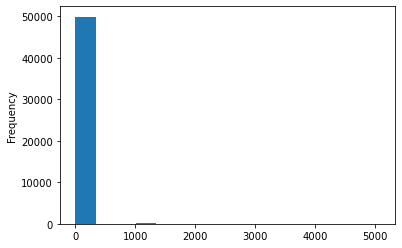

In [1068]:
ax = LeadScore_df['Web_Ad_Outlet'].plot.hist(bins=15)

In [1069]:
#ax = LeadScore_df['Web_Gross_Annual_Sales'].plot.hist(bins=15)

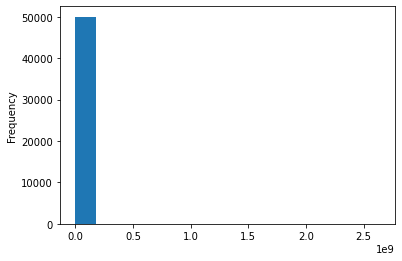

In [1070]:
ax = LeadScore_df['AnnualRevenue'].plot.hist(bins=15)

In [1071]:
#fig, axs = plt.subplots(figsize = (12,6))
#sns.countplot(x = 'Ad_Outlet_Source', hue= "Is_Submitted", LeadScore_df = LeadScore_df)
#xticks(rotation = 90)

In [1072]:
Outlet_dict = {"Digital - Affiliate":0, "Digital-Organic":1, "Direct":2 ,"Digital-PPC":3, "Lending Tree":4, 'Strategic Partners':5}
             
LeadScore_df['Web_Ad_Outlet_Source'].replace(Outlet_dict, inplace=True)

In [1073]:
LeadScore_df["Web_Ad_Outlet_Source"]= pd.to_numeric(LeadScore_df["Web_Ad_Outlet_Source"], downcast="float")

In [1074]:
#pd.options.display.float_format = '{:,.2f}'.format

array([<AxesSubplot:title={'center':'Lead_Score'}, xlabel='Is_Submitted'>,
       <AxesSubplot:title={'center':'Web_Amount_to_Borrow'}, xlabel='Is_Submitted'>],
      dtype=object)

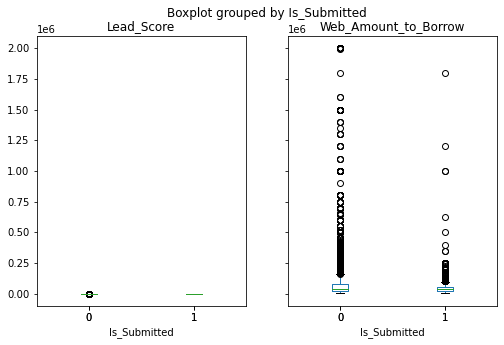

In [1075]:
LeadScore_df.boxplot(by ='Is_Submitted', column=['Lead_Score','Web_Amount_to_Borrow'], grid=False, figsize=(8,5))

In [1076]:
LeadScore_df.describe()

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Years_in_Business
count,4.999200e+04,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000,4.999200e+04,49992.000000,49992.000000
mean,3.110016e+05,0.016423,0.120159,16.139502,3.054789,20.614538,2.904445,5.254537e+04,229478.116499,4.533906
std,1.201925e+07,0.127095,0.325151,4.084633,0.966409,124.961298,1.141546,8.668966e+04,238260.533736,5.938278
min,0.000000e+00,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000e+03,35000.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,14.000000,2.000000,9.000000,2.000000,1.750000e+04,35000.000000,1.000000
50%,1.200000e+05,0.000000,0.000000,16.000000,3.000000,9.000000,3.000000,3.750000e+04,150000.000000,4.000000
75%,2.250000e+05,0.000000,0.000000,18.000000,4.000000,26.000000,4.000000,7.500000e+04,350000.000000,5.000000
max,2.639720e+09,1.000000,1.000000,24.000000,4.000000,5077.000000,5.000000,2.000000e+06,1000000.000000,114.000000


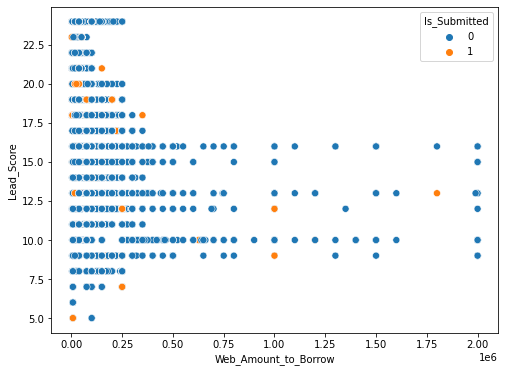

In [1077]:
#%matplotlib inline
plt.figure(figsize=(8,6))
sns.scatterplot("Web_Amount_to_Borrow","Lead_Score", hue="Is_Submitted", data=LeadScore_df, s=50)
plt.show()

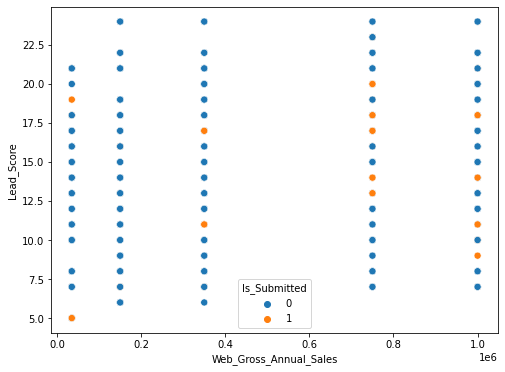

In [1078]:
plt.figure(figsize=(8,6))
sns.scatterplot( "Web_Gross_Annual_Sales","Lead_Score", hue="Is_Submitted", data=LeadScore_df, s=50)
plt.show()

In [1079]:
Submitted = (sum(LeadScore_df["Is_Submitted"])/len(LeadScore_df['Is_Submitted'].index))*100
Submitted

12.015922547607618

In [1080]:
Lead_cluster_data = LeadScore_df.groupby(['Is_Submitted']).mean()
Lead_cluster_data

,AnnualRevenue,Is_Funded,Lead_Score,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Years_in_Business
Is_Submitted,,,,,,,,,
0,320562.785040,0.000159,16.010276,3.048039,20.638377,2.886416,53507.683594,225655.905422,4.579584
1,240991.538871,0.135509,17.085733,3.104212,20.439987,3.036458,45624.621094,257465.456967,4.199434


In [1081]:
LeadScore_df.corr()

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Gross_Annual_Sales,Years_in_Business
AnnualRevenue,1.000000,0.000193,-0.002153,0.007871,-0.009048,0.175705,0.009674,0.005209,0.038066,0.017462
Is_Funded,0.000193,1.000000,0.346267,0.040785,-0.010094,0.013615,0.024185,-0.008941,0.038230,-0.009154
Is_Submitted,-0.002153,0.346267,1.000000,0.085610,0.018899,-0.000516,0.042728,-0.029570,0.043410,-0.020817
Lead_Score,0.007871,0.040785,0.085610,1.000000,0.550422,-0.050016,0.350548,-0.111464,0.239413,0.115157
Self_Graded_Credit,-0.009048,-0.010094,0.018899,0.550422,1.000000,-0.010835,-0.066971,-0.136282,-0.163187,-0.083759
Web_Ad_Outlet,0.175705,0.013615,-0.000516,-0.050016,-0.010835,1.000000,-0.019615,-0.017054,-0.009620,-0.020819
Web_Ad_Outlet_Source,0.009674,0.024185,0.042728,0.350548,-0.066971,-0.019615,1.000000,0.155339,0.291512,0.274529
Web_Amount_to_Borrow,0.005209,-0.008941,-0.029570,-0.111464,-0.136282,-0.017054,0.155339,1.000000,0.219687,0.125389
Web_Gross_Annual_Sales,0.038066,0.038230,0.043410,0.239413,-0.163187,-0.009620,0.291512,0.219687,1.000000,0.228527
Years_in_Business,0.017462,-0.009154,-0.020817,0.115157,-0.083759,-0.020819,0.274529,0.125389,0.228527,1.000000


In [1082]:
X = LeadScore_df[['Web_Amount_to_Borrow','AnnualRevenue','Web_Gross_Annual_Sales',
                  'Web_Ad_Outlet_Source','Lead_Score','Self_Graded_Credit','Web_Ad_Outlet','Years_in_Business']]

y = LeadScore_df[['Is_Submitted']]

In [1083]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1084]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1085]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                34994
Model:                            GLM   Df Residuals:                    34985
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12621.
Date:                Thu, 16 Sep 2021   Deviance:                       25241.
Time:                        10:25:07   Pearson chi2:                 3.49e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5781      0.065    -39.565      0.000      -2.706      -2.450
x1            -3.7237      0.688     -5.413      0.000      -5.072      -2.375
x2            -3.6685      2.221     -1.652      0.099      -8.022       0.685
x3             0.4461      0.078      5.752      0.000       0.294       0.598
x4             0.2073      0.083      2.511      0.012       0.045       0.369
x5             1.2855      0.101     12.737      0.000       1.088       1.483
x6            -0.2933      0.064     -4.588      0.000      -0.419      -0.168
x7             0.5644      0.552      1.023      0.306      -0.517       1.646
x8            -2.9559      0.396     -7.466      0.000      -3.732      -2.180
==============================================================================
"""

In [1086]:
X_train.shape, y_train.shape

((34994, 8), (34994, 1))

In [1087]:
X_test.shape, y_test.shape

((14998, 8), (14998, 1))

In [1088]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.003649
Feature 1: 0.004830
Feature 2: 0.007322
Feature 3: 0.002856
Feature 4: 0.006120
Feature 5: 0.003858
Feature 6: 0.005013
Feature 7: 0.002297


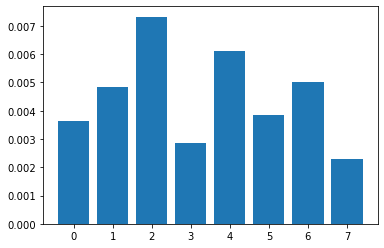

In [1094]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [1102]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [1103]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 8)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [1104]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [1105]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [1106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Web_Amount_to_Borrow', True, 1),
 ('AnnualRevenue', True, 1),
 ('Web_Gross_Annual_Sales', True, 1),
 ('Web_Ad_Outlet_Source', True, 1),
 ('Lead_Score', True, 1),
 ('Self_Graded_Credit', True, 1),
 ('Web_Ad_Outlet', True, 1),
 ('Years_in_Business', True, 1)]

In [1107]:
col = X_train.columns[rfe.support_]
col

Index(['Web_Amount_to_Borrow', 'AnnualRevenue', 'Web_Gross_Annual_Sales',
       'Web_Ad_Outlet_Source', 'Lead_Score', 'Self_Graded_Credit',
       'Web_Ad_Outlet', 'Years_in_Business'],
      dtype='object')

In [1108]:
X_train_sm = sm.add_constant(X_train[col].values)

X_train_sm = sm.add_constant(X_train[col].values)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                34994
Model:                            GLM   Df Residuals:                    34985
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12621.
Date:                Thu, 16 Sep 2021   Deviance:                       25241.
Time:                        10:46:07   Pearson chi2:                 3.49e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5781      0.065    -39.565      0.000      -2.706      -2.450
x1            -3.7237      0.688     -5.413      0.000      -5.072      -2.375
x2            -3.6685      2.221     -1.652      0.099      -8.022       0.685
x3             0.4461      0.078      5.752      0.000       0.294       0.598
x4             0.2073      0.083      2.511      0.012       0.045       0.369
x5             1.2855      0.101     12.737      0.000       1.088       1.483
x6            -0.2933      0.064     -4.588      0.000      -0.419      -0.168
x7             0.5644      0.552      1.023      0.306      -0.517       1.646
x8            -2.9559      0.396     -7.466      0.000      -3.732      -2.180
==============================================================================
"""

In [1109]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.17901646, 0.11612601, 0.09532146, 0.18135254, 0.12166157,
       0.0981996 , 0.098502  , 0.1438432 , 0.16720335, 0.14356719])

In [1110]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([0.17901646, 0.11612601, 0.09532146, 0.18135254, 0.12166157,
       0.0981996 , 0.098502  , 0.1438432 , 0.16720335, 0.14356719])

In [1111]:
# find the predicted-prob
Submitted_prob = y_train_pred
Submitted = y_train.values
y_train_pred_final = pd.DataFrame(Submitted,Submitted_prob)
                                  
                                   
y_train_pred_final['Prospect_ID'] = y_train.index

y_train_pred_final

,0,Prospect_ID
0.179016,0,56356
0.116126,0,45289
0.095321,0,27242
0.181353,0,48329
0.121662,0,6319
...,...,...
0.124944,0,25295
0.099365,0,70838
0.089442,0,60893
0.094773,1,63392


In [1112]:
y_train_pred_final.reset_index(inplace=True)

In [1113]:
y_train_pred_final.rename(columns = {"index":"Submitted_Prob", 0:"Submitted"}, inplace=True)

In [1119]:
y_train_pred_final['predicted'] = y_train_pred_final.Submitted_Prob.apply(lambda x: 1 if x > 0.14 else 0)

# Let's see the head
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,predicted
0,0.179016,0,56356,1
1,0.116126,0,45289,0
2,0.095321,0,27242,0
3,0.181353,0,48329,1
4,0.121662,0,6319,0


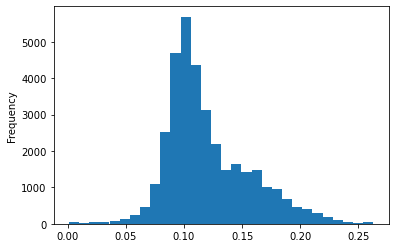

In [1120]:
ax = y_train_pred_final['Submitted_Prob'].plot.hist(bins=30)

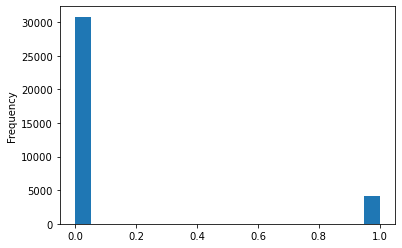

In [1121]:
ax = y_train_pred_final['Submitted'].plot.hist(bins=20)

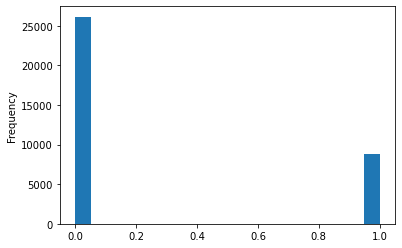

In [1122]:
ax = y_train_pred_final['predicted'].plot.hist(bins=20)

In [1123]:
y_train_pred_final.to_csv('Sub_probN.csv', index = True)

In [1124]:
import imblearn

In [1125]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
# fit predictor and target 

variablex_ros, y_ros = ros.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'Is_Submitted': 1})
Resample dataset shape Counter({'Is_Submitted': 1})


In [1126]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({'Is_Submitted': 1})


In [828]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.873


In [911]:
#  Logistic regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [912]:
accuracy_logreg = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

Cross Validation Scores for Log Reg: [0.45237013 0.45515517 0.6299875  0.64328748 0.63663749]
Mean Accuracy Score for Log Reg: 0.5634875525747415



In [913]:
accuracy_score(y_test,y_pred, normalize=True) * 100

87.91838911854914

In [914]:
print("Training score:", model.score(X_train, y_train))

Training score: 0.8801223066811453


In [915]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(model,  X, y, scoring=scoring, cv=5, 
                        return_train_score=False)

In [916]:
scores

{'fit_time': array([0.21101594, 0.22703624, 0.10901046, 0.23780727, 0.11101198]),
 'score_time': array([0.0210042 , 0.01900315, 0.02020836, 0.02000308, 0.02400374]),
 'test_acc': array([0.45237013, 0.45515517, 0.6299875 , 0.64328748, 0.63663749]),
 'test_prec': array([0.46669846, 0.47100757, 0.67830968, 0.70613246, 0.69232   ]),
 'test_rec': array([0.66750028, 0.72854382, 0.49448676, 0.49084915, 0.49187223]),
 'test_f1': array([0.5493241 , 0.57212998, 0.57199211, 0.5791309 , 0.57513126])}

In [917]:
KNN_model = KNeighborsClassifier()

In [918]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.72354212 0.72411049 0.72723656 0.72143913 0.71672161]
Mean Accuracy Score for KNN: 0.7226099806752303


In [919]:
param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 1}
Best Cross Vlidation Score: 0.7450608161873367


In [528]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None],
             'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'splitter': 'best'}

In [529]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'],
                                       criterion= grid_search.best_params_['criterion'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [530]:
y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 67.62811282719736
Out-of-sample Accuracy: 67.28049834038103


In [531]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix
[[8617 2392]
 [4804 6180]]
              precision    recall  f1-score   support

           0       0.64      0.78      0.71     11009
           1       0.72      0.56      0.63     10984

    accuracy                           0.67     21993
   macro avg       0.68      0.67      0.67     21993
weighted avg       0.68      0.67      0.67     21993



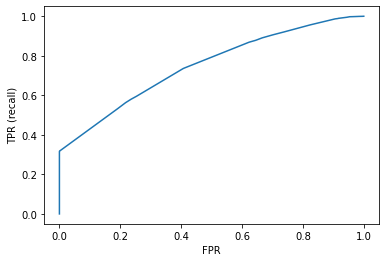

In [532]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [533]:
y_pred_prob =model.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

In [534]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

AUC for logreg: 0.749


In [535]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,X,y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.24796988 0.23790377 0.77307656 0.74858058 0.66586669]


In [536]:
feature_names = X = LeadScore_df[['Web_Amount_to_Borrow','AnnualRevenue','Web_Gross_Annual_Sales',
                  'Web_Ad_Outlet_Source','Lead_Score','Self_Graded_Credit','Web_Ad_Outlet','Years in Business']]

In [537]:
#print(feature_names)
model.feature_importances_

array([0.03520758, 0.00192174, 0.08800191, 0.02953412, 0.00256801,
       0.74246477, 0.02325909, 0.07704278])

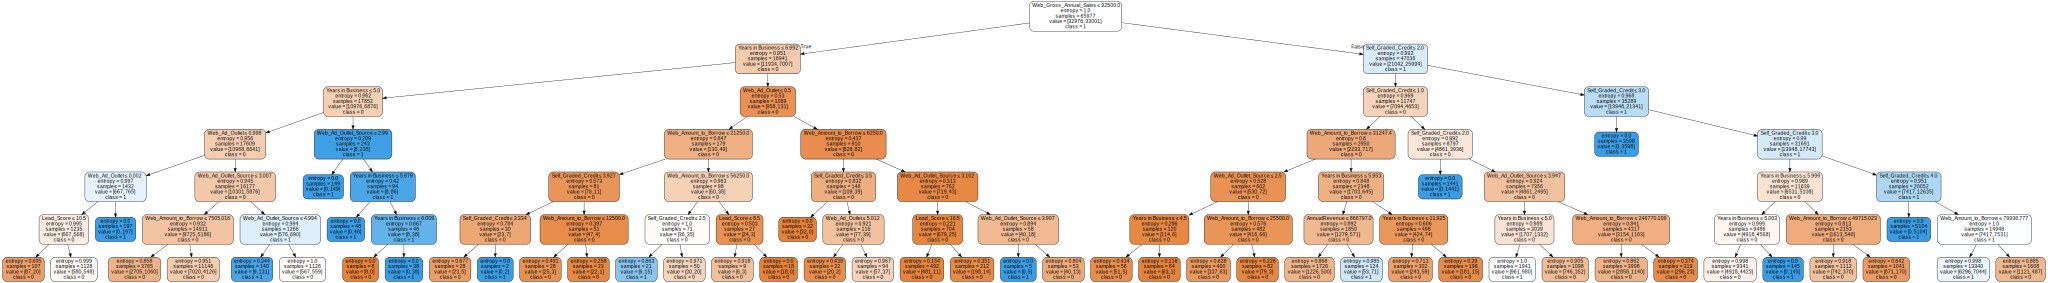

<Figure size 1440x1080 with 0 Axes>

In [538]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(20,15))

class_names = ['0', '1']
feature_names = X.columns

dot_data = tree.export_graphviz(model, 
                  feature_names=feature_names, 
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)
                           
graph = graphviz.Source(dot_data)
graph

In [539]:
graph.render("decision_treeLeadN_graphviz")
'decision_treeLeadN_graphviz.png'

'decision_treeLeadN_graphviz.png'

In [542]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()

,Feature_Importance
Self_Graded_Credit,0.742465
Web_Gross_Annual_Sales,0.088002
Years in Business,0.077043
Web_Amount_to_Borrow,0.035208
Web_Ad_Outlet_Source,0.029534


In [543]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100
print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 88.58693180957
Out-of-sample Accuracy: 82.4626017369163


In [544]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [545]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [579]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8791838911854915


In [ ]:
# Random sample of 200 rows
#df.sample(n=200).head(10)


# Saving the randomly sampled rows:
#df200 = df.sample(n=200)
#df200.shape
# Output: (200, 5)

In [ ]:
#len(CreditRisk_merge['contract_number'].unique())